# Problem

We have been contacted by a customer who would like to find out how TV ads drive traffic and purchases in their online store. From them, we have received the following datasets:
- timeseries.pkl.gz: a minute-level timeseries table, containing visits, registrations and first purchases to the website (accessed in this notebook as 'ts')
- media_investments.pkl.gz: a table containing the timestamps, costs and a connecting metadata id for the TV ads (accessed as 'minv')
- media_dimensions.pkl.gz: a metadata table for the ads, containing assorted extra information. We will ignore this table for now.

Our job is to find out:

a). do the TV ads have any effect?

b). what kind of effect?

c). (if time allows) how we can quantify this effect?

# Code

Modules; feel free to import any you'd like

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the dfs
ts = pd.read_csv('files/timeseries.csv.gz')
ts.loc[:, 'ts'] = pd.to_datetime(ts['ts'])
minv = pd.read_csv('files/media_investments.csv.gz')
minv.loc[:, 'ts'] = pd.to_datetime(minv['ts'])
mdim = pd.read_csv('files/media_dimensions.csv.gz')

In [4]:
ts.head(10)

,ts,traffic,registrations,first_purchases
0,2020-07-01 00:00:00,58.0,0.0,0.0
1,2020-07-01 00:01:00,61.0,0.0,0.0
2,2020-07-01 00:02:00,64.0,2.0,1.0
3,2020-07-01 00:03:00,60.0,1.0,0.0
4,2020-07-01 00:04:00,61.0,2.0,0.0
5,2020-07-01 00:05:00,55.0,1.0,0.0
6,2020-07-01 00:06:00,50.0,1.0,0.0
7,2020-07-01 00:07:00,56.0,1.0,0.0
8,2020-07-01 00:08:00,65.0,0.0,0.0
9,2020-07-01 00:09:00,57.0,0.0,0.0


In [5]:
minv.head(10)

,ts,media_investment,media_index
0,2020-07-01 01:14:00,424.732863,1133
1,2020-07-01 04:39:00,324.863646,5020
2,2020-07-01 05:07:00,165.070659,3397
3,2020-07-01 06:51:00,264.791902,2744
4,2020-07-01 07:21:00,327.557838,4787
5,2020-07-01 11:47:00,706.992475,5525
6,2020-07-01 11:57:00,315.117000,479
7,2020-07-01 13:12:00,792.241255,3246
8,2020-07-01 13:15:00,530.935781,3042
9,2020-07-01 15:18:00,793.499552,3248


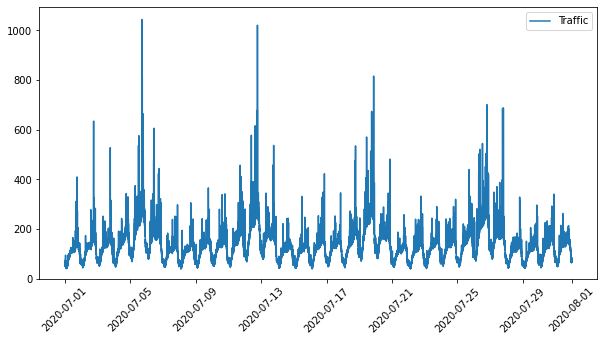

In [8]:
start_time = '2020-07-01 00:00:01'
end_time = '2020-07-31 23:59:59'
plot_ads = False
ts_to_plot = ['traffic']
to_plot = ts.loc[(ts['ts'] >= pd.Timestamp(start_time)) & (ts['ts'] <= pd.Timestamp(end_time))]
minv_plot = minv.loc[(minv['ts'] >= pd.Timestamp(start_time)) & (minv['ts'] <= pd.Timestamp(end_time))]
fig, ax = plt.subplots(figsize=(10, 5))
for ts_plt in ts_to_plot:
    ax.plot(to_plot['ts'], to_plot[ts_plt], label=ts_plt.title())
ymin, ymax = ax.get_ylim()
ax.set_ylim([0, ymax])
if plot_ads:
    for mi in minv_plot['ts'].values:
        ax.axvline(mi, linestyle='--', color='k')
plt.xticks(rotation=45)
ax.legend()